# Week II: Feature and model selection

This week we'll cover the topics of feature and model selection. 

**Model selection**: given a dataset, our goal is to choose the most fitting model.

**Feature selection**: given a dataset and a model, our goal is to choose a subset of the dataset's features for which the model performs best.

## Dataset: Boston house prices

Throughout this exercise we'll be using the Boston real-estate dataset (available online [here](http://lib.stat.cmu.edu/datasets/boston)). The goal in this dataset is to predict the prices of houses given a set of real-estate related variables.



According to the documentation, these are the definition of all variables:
 1. **CRIM:**     per capita crime rate by town
 2. **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
 3. **INDUS:**    proportion of non-retail business acres per town
 4. **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 5. **NOX:**      nitric oxides concentration (parts per 10 million)
 6. **RM:**       average number of rooms per dwelling
 7. **AGE:**      proportion of owner-occupied units built prior to 1940
 8. **DIS:**      weighted distances to five Boston employment centres
 9. **RAD:**      index of accessibility to radial highways
 10. **TAX:**      full-value property-tax rate per 10,000 USD
 11. **PTRATIO:**  pupil-teacher ratio by town
 12. **B:**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 13. **LSTAT:**    % lower status of the population
 14. **MEDV:**     Median value of owner-occupied homes in $1000's

### Loading the data

The data is saved on Google drive. In order to import it we'll need to mount our drive into the notebook, using Google's library. Note that you'll need to authenticate your Google account.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now that the drive is mounted, we can access files in it. Let's use pandas to load the dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


We can see that there are indeed 14 columns (variables) and 506 rows (samples) in the dataset. 

MEDV is our target (the house price) so we'll split the dataframe to two:



In [4]:
X = df.drop(['MEDV'], axis=1)
Y = df[['MEDV']]
X, Y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
 505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       17.8  39

As usual, we'll split the data into training and testing datasets:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Exploring the data



Let's look at some statistical attributes of the data:

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Let's look at the Pearson correlation between the features:

In [7]:
correlations = df.corr()

Let's plot the correlation matrix using matplotlib and seaborn:

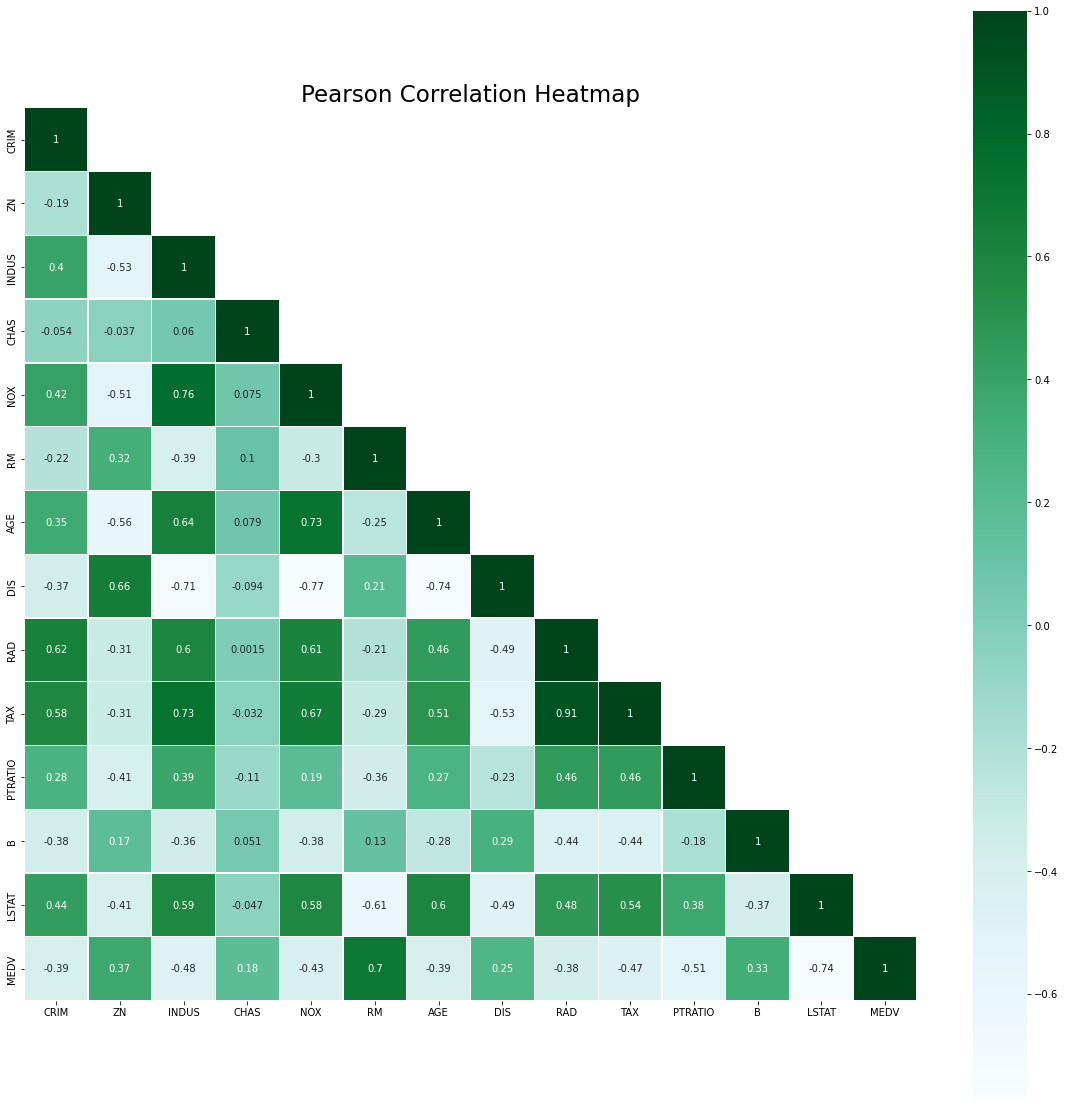

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(correlations, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask)

Check for null values:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Most of the columns are of type float64, and only two are of type int64. We can also see that there are some null values in the dataset. Fortunately, none of them are in the label column. There are many ways to deal with null values, for example, we can:

*   Drop rows with nulls
*   Replace them with average
*   Replace them with default value
*   Use interpolation


This time we replace these values with zeros:

In [10]:
X_train, X_test = X_train.fillna(0), X_test.fillna(0)

## Model selection

Now that we have the data, we can proceed to train a model. Given a set of features, our goal is to predict a real number - the value of the property. In other words, this is a regression probelm so we'll only consider regression algorithms. In today's examples we'll compare linear regression and random forest.


We'll create a dictionary to save the models:

In [11]:
models = {'Random forest': None,
          'Decision tree': None,
          'Linear regression': None,
          'Ridge regression': None}

### Random forest

Let's setup a function that trains a random forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

We'll use RandomizedSearchCV to find the best number of trees for our RF:

In [13]:
def run_random_forest(x_train, y_train):
  rf = RandomForestRegressor(n_estimators=200, random_state=42)
  tuned_rf = GridSearchCV(estimator=rf, 
                          param_grid={'max_features': ['auto', 'sqrt', 'log2', 1/3]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3,
                          refit=True)
  tuned_rf.fit(x_train, y_train)
  return tuned_rf

### Single decision tree

Let's setup a function that trains a single decision tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

We'll use RandomizedSearchCV to find the best number of trees for our RF:

In [15]:
def run_decision_tree(x_train, y_train):
  dt = DecisionTreeRegressor(random_state=42)
  tuned_dt = GridSearchCV(estimator=dt, 
                          param_grid={'max_features': ['auto', 'sqrt', 'log2', 1/3]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3)
  tuned_dt.fit(x_train, y_train)
  return tuned_dt

### Linear regression
Let's repeat a similar process for linear regression. 

We'll begin by building a linear regression function:

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [17]:
def run_linear_regression(x_train, y_train):
  lr = LinearRegression()
  lr.fit(x_train, np.ravel(y_train))
  cv_score = cross_val_score(lr, x_train, y_train, scoring='neg_mean_squared_error', cv=3)
  return lr, cv_score

### Ridge regression

Let's repeat a similar process for ridge regression. From Sklearn docs:

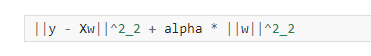

We'll begin by building a linear regression function:

In [18]:
from sklearn.linear_model import Ridge

In [19]:
def run_ridge_regression(x_train, y_train):
  rr = Ridge()
  tuned_rr = GridSearchCV(estimator=rr, 
                          param_grid={'alpha': [0.05, 0.5, 1]},
                          scoring='neg_mean_squared_error',
                          cv=3, 
                          verbose=3)
  tuned_rr.fit(x_train, np.ravel(y_train))
  return tuned_rr

### Run all models
Let's run all models:

In [20]:
def run_all_models(x, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x, y)
  models_dict['Decision tree'] = run_decision_tree(x, y)
  models_dict['Linear regression'] = run_linear_regression(x, y)
  models_dict['Ridge regression'] = run_ridge_regression(x, y)
  return models_dict

In [21]:
models = run_all_models(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ...............max_features=auto;, score=-21.210 total time=   0.6s
[CV 2/3] END ...............max_features=auto;, score=-25.719 total time=   0.6s
[CV 3/3] END ...............max_features=auto;, score=-10.984 total time=   0.6s
[CV 1/3] END ...............max_features=sqrt;, score=-17.162 total time=   0.4s
[CV 2/3] END ...............max_features=sqrt;, score=-16.257 total time=   0.4s
[CV 3/3] END ...............max_features=sqrt;, score=-15.720 total time=   0.4s
[CV 1/3] END ...............max_features=log2;, score=-17.162 total time=   0.4s
[CV 2/3] END ...............max_features=log2;, score=-16.257 total time=   0.4s
[CV 3/3] END ...............max_features=log2;, score=-15.720 total time=   0.4s
[CV 1/3] END .max_features=0.3333333333333333;, score=-17.316 total time=   0.4s
[CV 2/3] END .max_features=0.3333333333333333;, score=-15.672 total time=   0.4s
[CV 3/3] END .max_features=0.3333333333333333;, s

In [22]:
models

{'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'Decision tree': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'Linear regression': (LinearRegression(),
  array([-24.96331537, -26.20175336, -22.50113198])),
 'Ridge regression': GridSearchCV(cv=3, estimator=Ridge(), param_grid={'alpha': [0.05, 0.5, 1]},
              scoring='neg_mean_squared_error', verbose=3)}

Comparing their cross validation scores:

In [23]:
cv_scores = {}
cv_scores['Random forest'] = models['Random forest'].best_score_
cv_scores['Decision tree'] = models['Decision tree'].best_score_
cv_scores['Ridge regression'] = models['Ridge regression'].best_score_
cv_scores['Linear regression'] = models['Linear regression'][1].mean()
cv_scores

{'Random forest': -15.876247833079956,
 'Decision tree': -28.32452496775382,
 'Ridge regression': -24.56765117744926,
 'Linear regression': -24.555400236095664}

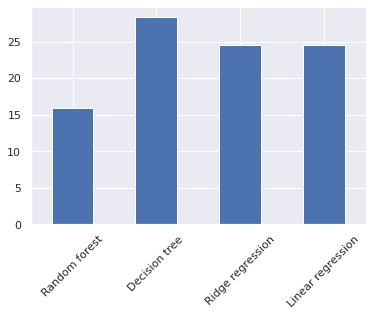

In [24]:
sns.set()
cv_scores_df = -pd.DataFrame.from_dict(cv_scores, orient='index')
cv_scores_df.plot.bar(rot=45, legend=False)

In [25]:
models['Random forest'].best_params_

{'max_features': 0.3333333333333333}

In [26]:
models['Decision tree'].best_params_

{'max_features': 'auto'}

In [27]:
models['Ridge regression'].best_params_

{'alpha': 0.05}

# Evaluating on test set

Let's evaluate all models:

In [28]:
from sklearn.metrics import mean_squared_error

def evaluate_single_model(x, y, model):
  y_pred = model.predict(x)
  return mean_squared_error(y, y_pred)

And test the function:

In [29]:
evaluate_single_model(X_test, Y_test, models['Random forest'].best_estimator_)

10.330201774509797

Let's create a dictionary that includes only trained models:

In [30]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Decision tree'] = models['Decision tree'].best_estimator_
trained_models_dict['Ridge regression'] = models['Ridge regression'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict

{'Random forest': RandomForestRegressor(max_features=0.3333333333333333, n_estimators=200,
                       random_state=42),
 'Decision tree': DecisionTreeRegressor(max_features='auto', random_state=42),
 'Ridge regression': Ridge(alpha=0.05),
 'Linear regression': LinearRegression()}

And create a function that iterates over all models:

In [31]:
def evaluate_all_models(x, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x, y, v)
  return test_set_scores

Finally, let's run our function:

In [32]:
test_set_scores = evaluate_all_models(X_test, Y_test, trained_models_dict)
test_set_scores

{'Random forest': 10.330201774509797,
 'Decision tree': 24.693921568627452,
 'Ridge regression': 25.931650205256418,
 'Linear regression': 25.929696549627003}

### Overall comparison

Let's combine the two dictionaries:

In [33]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Random forest': [15.876247833079956, 10.330201774509797],
 'Decision tree': [28.32452496775382, 24.693921568627452],
 'Ridge regression': [24.56765117744926, 25.931650205256418],
 'Linear regression': [24.555400236095664, 25.929696549627003]}

And compare the CV score to the test set score:

In [34]:
scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score', 'Test set score'])
scores_df

,CV score,Test set score
Random forest,15.876248,10.330202
Decision tree,28.324525,24.693922
Ridge regression,24.567651,25.931650
Linear regression,24.555400,25.929697


## Feature selection

Now that we saw basic results of two different models, let's try and experiment with the features themselves.

### Responsible AI

The decisions of data scientists can often affect the lives of real people. Hence, there are many ethical considerations to be taken. In the industry, such concerns are well though out.

Let's examine our case. There is one obious feature that stands out: the feature that is named **B**. It's unethical to use features such as skin color when using an AI model. Hence, we'll remove it.

Let's remove feature **B**:

In [35]:
X_train, X_test = X_train.drop(['B'], axis=1), X_test.drop(['B'], axis=1)
X_train, X_test

(         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  TAX  \
 477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007   24  666   
 15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986    4  307   
 332   0.03466   0.0   6.06   0.0  0.4379  6.031  23.3  6.6407    1  304   
 423   7.05042   0.0  18.10   0.0  0.6140  6.103   0.0  2.0218   24  666   
 19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965    4  307   
 ..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
 106   0.17120   0.0   8.56   0.0  0.5200  5.836  91.9  2.2110    5  384   
 270   0.29916  20.0   6.96   0.0  0.4640  5.856  42.1  4.4290    3  223   
 348   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440    4  280   
 435  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247   24  666   
 102   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147    5  384   
 
      PTRATIO  LSTAT  
 477     20.2  24.91  
 15      21.0   8.47  
 332     16.9   7

Now we'll retrain the models without the unethical feature:

In [36]:
models = run_all_models(X_train, Y_train.values.ravel())
models

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ...............max_features=auto;, score=-21.489 total time=   0.5s
[CV 2/3] END ...............max_features=auto;, score=-24.659 total time=   0.5s
[CV 3/3] END ...............max_features=auto;, score=-10.716 total time=   0.5s
[CV 1/3] END ...............max_features=sqrt;, score=-18.105 total time=   0.3s
[CV 2/3] END ...............max_features=sqrt;, score=-15.766 total time=   0.3s
[CV 3/3] END ...............max_features=sqrt;, score=-14.889 total time=   0.3s
[CV 1/3] END ...............max_features=log2;, score=-18.105 total time=   0.3s
[CV 2/3] END ...............max_features=log2;, score=-15.766 total time=   0.3s
[CV 3/3] END ...............max_features=log2;, score=-14.889 total time=   0.3s
[CV 1/3] END .max_features=0.3333333333333333;, score=-18.140 total time=   0.3s
[CV 2/3] END .max_features=0.3333333333333333;, score=-15.265 total time=   0.4s
[CV 3/3] END .max_features=0.3333333333333333;, s

{'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'Decision tree': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'Linear regression': (LinearRegression(),
  array([-26.27222194, -26.57329855, -23.2895572 ])),
 'Ridge regression': GridSearchCV(cv=3, estimator=Ridge(), param_grid={'alpha': [0.05, 0.5, 1]},
              scoring='neg_mean_squared_error', verbose=3)}

In [37]:
cv_scores = {}
cv_scores['Random forest'] = models['Random forest'].best_score_
cv_scores['Decision tree'] = models['Decision tree'].best_score_
cv_scores['Ridge regression'] = models['Ridge regression'].best_score_
cv_scores['Linear regression'] = models['Linear regression'][1].mean()
cv_scores

{'Random forest': -15.918191783121422,
 'Decision tree': -32.231269209508014,
 'Ridge regression': -25.37805381449424,
 'Linear regression': -25.378359230504387}

In [38]:
models['Random forest'].best_params_

{'max_features': 0.3333333333333333}

In [39]:
models['Decision tree'].best_params_

{'max_features': 'sqrt'}

In [40]:
models['Ridge regression'].best_params_

{'alpha': 0.05}

In [41]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Decision tree'] = models['Decision tree'].best_estimator_
trained_models_dict['Ridge regression'] = models['Ridge regression'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict

{'Random forest': RandomForestRegressor(max_features=0.3333333333333333, n_estimators=200,
                       random_state=42),
 'Decision tree': DecisionTreeRegressor(max_features='sqrt', random_state=42),
 'Ridge regression': Ridge(alpha=0.05),
 'Linear regression': LinearRegression()}

In [42]:
test_set_scores = evaluate_all_models(X_test, Y_test, trained_models_dict)
test_set_scores

{'Random forest': 9.93215186138343,
 'Decision tree': 26.54833333333334,
 'Ridge regression': 24.682874584788507,
 'Linear regression': 24.68042552557484}

In [43]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Random forest': [15.918191783121422, 9.93215186138343],
 'Decision tree': [32.231269209508014, 26.54833333333334],
 'Ridge regression': [25.37805381449424, 24.682874584788507],
 'Linear regression': [25.378359230504387, 24.68042552557484]}

In [44]:
scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score', 'Test set score'])
scores_df

,CV score,Test set score
Random forest,15.918192,9.932152
Decision tree,32.231269,26.548333
Ridge regression,25.378054,24.682875
Linear regression,25.378359,24.680426


### Feature importance

Let's find the importance of all features for each model and remove insignificant features:

In [45]:
feature_importance_dict = {}

#### Tree based methods

For tree based models we can use SKLearn's built-in methods:

In [46]:
def find_tree_feature_importance(model, columns):
  importance = model.feature_importances_
  importance *= 100 / np.max(importance)  # Normalize
  importance = pd.DataFrame(importance, index=columns, columns=["Importance"])
  importance = importance.sort_values(by=['Importance'], ascending=False)
  return importance

In [47]:
feature_importance_dict['Random forest'] = find_tree_feature_importance(trained_models_dict['Random forest'], X_train.columns)
feature_importance_dict['Decision tree'] = find_tree_feature_importance(trained_models_dict['Decision tree'], X_train.columns)

#### Classical regression methods

One interpetation of feature importance for linear/ridge regression, is the normalized value of the estimator's coefficients:

In [48]:
def find_normalized_lr_feature_importance(model, x_train):
  coefficients = {x_train.columns[i]: np.abs(model.coef_[i]) for i in range(len(x_train.columns))}
  coefficients_df = pd.DataFrame.from_dict(coefficients, orient='index', columns=['Importance'])
  coefficients_df['Importance'] *=  x_train.std()
  coefficients_df['Importance'] *= 100 / coefficients_df['Importance'].max()
  importance = coefficients_df.sort_values(by=['Importance'], ascending=False)
  return importance

In [49]:
feature_importance_dict['Linear regression'] = find_normalized_lr_feature_importance(trained_models_dict['Linear regression'], X_train)
feature_importance_dict['Ridge regression'] = find_normalized_lr_feature_importance(trained_models_dict['Ridge regression'], X_train)

#### Comparison

Let's visualize the different feature imprtance across the models:

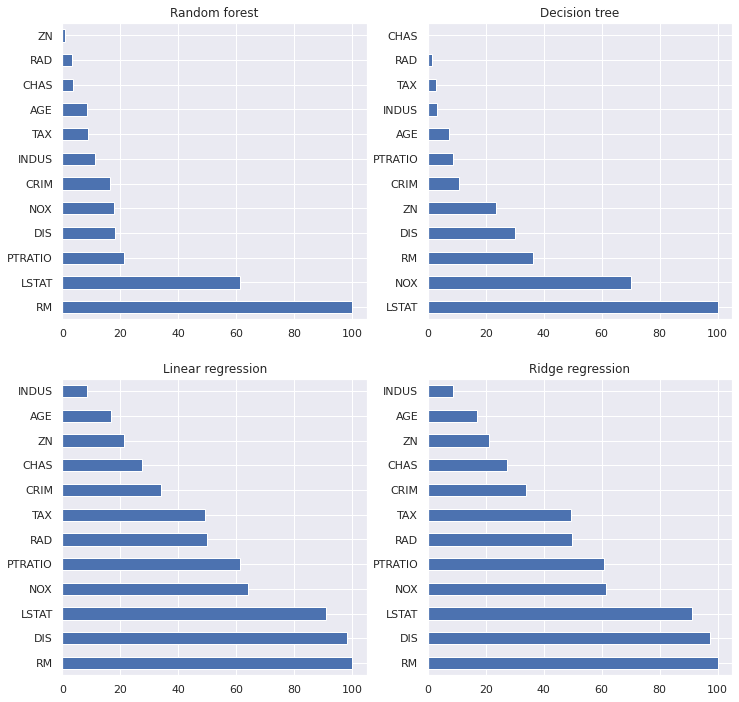

In [50]:
sns.set()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
feature_importance_dict['Random forest'].plot(kind='barh', ax=axes[0, 0], legend=False, title='Random forest')
feature_importance_dict['Decision tree'].plot(kind='barh', ax=axes[0, 1], legend=False, title='Decision tree')
feature_importance_dict['Linear regression'].plot(kind='barh', ax=axes[1, 0], legend=False, title='Linear regression')
feature_importance_dict['Ridge regression'].plot(kind='barh', ax=axes[1, 1], legend=False, title='Ridge regression')

#### Removing weak features

Let's find the 3 weakest features in each model:

In [51]:
weak_features_dict = {}
for k, v in feature_importance_dict.items():
  weak_features_dict[k] = list(v.index.values[-3:])
weak_features_dict

{'Random forest': ['CHAS', 'RAD', 'ZN'],
 'Decision tree': ['TAX', 'RAD', 'CHAS'],
 'Linear regression': ['ZN', 'AGE', 'INDUS'],
 'Ridge regression': ['ZN', 'AGE', 'INDUS']}

And remove these features from each model. We create a dictionary mapping each model to X_train and X_test without the last 3 features:

In [52]:
x_data_dict = {}
for k, v in weak_features_dict.items():
  x_data_dict[k] = (X_train.drop(v, axis=1), X_test.drop(v, axis=1))

Verify:

In [53]:
x_data_dict['Random forest'][0]

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
477,15.02340,18.10,0.6140,5.304,97.3,2.1007,666,20.2,24.91
15,0.62739,8.14,0.5380,5.834,56.5,4.4986,307,21.0,8.47
332,0.03466,6.06,0.4379,6.031,23.3,6.6407,304,16.9,7.83
423,7.05042,18.10,0.6140,6.103,0.0,2.0218,666,20.2,23.29
19,0.72580,8.14,0.5380,5.727,69.5,3.7965,307,21.0,11.28
...,...,...,...,...,...,...,...,...,...
106,0.17120,8.56,0.5200,5.836,91.9,2.2110,384,20.9,18.66
270,0.29916,6.96,0.4640,5.856,42.1,4.4290,223,18.6,13.00
348,0.01501,2.01,0.4350,6.635,29.7,8.3440,280,17.0,5.99
435,11.16040,18.10,0.7400,6.629,94.6,2.1247,666,20.2,23.27


In [54]:
x_data_dict['Random forest'][1]

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
173,0.09178,0.00,0.510,6.416,0.0,2.6463,296,16.6,9.04
274,0.05644,6.41,0.447,6.758,32.9,4.0776,254,17.6,3.53
491,0.10574,27.74,0.609,5.983,98.8,1.8681,711,20.1,18.07
72,0.09164,10.81,0.413,6.065,7.8,5.2873,305,19.2,5.52
452,5.09017,18.10,0.713,6.297,91.8,2.3682,666,20.2,17.27
...,...,...,...,...,...,...,...,...,...
412,18.81100,18.10,0.597,4.628,100.0,1.5539,666,20.2,34.37
436,14.42080,18.10,0.740,6.461,93.3,2.0026,666,20.2,18.05
411,14.05070,18.10,0.597,6.657,100.0,1.5275,666,20.2,21.22
86,0.05188,4.49,0.449,6.015,45.1,4.4272,247,18.5,12.86


Let's modify run_all_models to allow us to run on different datasets:

In [55]:
def run_all_models(x_dict, y):
  models_dict = {}
  models_dict['Random forest'] = run_random_forest(x_dict['Random forest'][0], y)
  models_dict['Decision tree'] = run_decision_tree(x_dict['Decision tree'][0], y)
  models_dict['Linear regression'] = run_linear_regression(x_dict['Linear regression'][0], y)
  models_dict['Ridge regression'] = run_ridge_regression(x_dict['Ridge regression'][0], y)
  return models_dict

And run:

In [56]:
models = run_all_models(x_data_dict, Y_train.values.ravel())
models

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ...............max_features=auto;, score=-21.182 total time=   0.5s
[CV 2/3] END ...............max_features=auto;, score=-24.721 total time=   0.5s
[CV 3/3] END ...............max_features=auto;, score=-10.632 total time=   0.5s
[CV 1/3] END ...............max_features=sqrt;, score=-17.798 total time=   0.3s
[CV 2/3] END ...............max_features=sqrt;, score=-16.111 total time=   0.3s
[CV 3/3] END ...............max_features=sqrt;, score=-15.033 total time=   0.3s
[CV 1/3] END ...............max_features=log2;, score=-17.798 total time=   0.4s
[CV 2/3] END ...............max_features=log2;, score=-16.111 total time=   0.3s
[CV 3/3] END ...............max_features=log2;, score=-15.033 total time=   0.3s
[CV 1/3] END .max_features=0.3333333333333333;, score=-17.798 total time=   0.4s
[CV 2/3] END .max_features=0.3333333333333333;, score=-16.111 total time=   0.3s
[CV 3/3] END .max_features=0.3333333333333333;, s

{'Random forest': GridSearchCV(cv=3,
              estimator=RandomForestRegressor(n_estimators=200, random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'Decision tree': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
              param_grid={'max_features': ['auto', 'sqrt', 'log2',
                                           0.3333333333333333]},
              scoring='neg_mean_squared_error', verbose=3),
 'Linear regression': (LinearRegression(),
  array([-26.40356741, -27.20127573, -21.63597095])),
 'Ridge regression': GridSearchCV(cv=3, estimator=Ridge(), param_grid={'alpha': [0.05, 0.5, 1]},
              scoring='neg_mean_squared_error', verbose=3)}

In [57]:
cv_scores = {}
cv_scores['Random forest'] = models['Random forest'].best_score_
cv_scores['Decision tree'] = models['Decision tree'].best_score_
cv_scores['Ridge regression'] = models['Ridge regression'].best_score_
cv_scores['Linear regression'] = models['Linear regression'][1].mean()
cv_scores

{'Random forest': -16.313996951340517,
 'Decision tree': -30.467892205638478,
 'Ridge regression': -25.083199382596263,
 'Linear regression': -25.080271364209793}

In [58]:
trained_models_dict = {}
trained_models_dict['Random forest'] = models['Random forest'].best_estimator_
trained_models_dict['Decision tree'] = models['Decision tree'].best_estimator_
trained_models_dict['Ridge regression'] = models['Ridge regression'].best_estimator_
trained_models_dict['Linear regression'] = models['Linear regression'][0]
trained_models_dict

{'Random forest': RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42),
 'Decision tree': DecisionTreeRegressor(max_features='sqrt', random_state=42),
 'Ridge regression': Ridge(alpha=0.05),
 'Linear regression': LinearRegression()}

We'll need to modify evaluate_all_models as well:

In [59]:
def evaluate_all_models(x_dict, y, models_dict):
  test_set_scores = {}
  for k, v in models_dict.items():
    test_set_scores[k] = evaluate_single_model(x_dict[k][1], y, v)
  return test_set_scores

In [60]:
test_set_scores = evaluate_all_models(x_data_dict, Y_test, trained_models_dict)
test_set_scores

{'Random forest': 9.128750252450981,
 'Decision tree': 10.13078431372549,
 'Ridge regression': 25.616690153170307,
 'Linear regression': 25.612095689231538}

In [61]:
combined_dict = {k: [np.abs(v), test_set_scores[k]] for k, v in cv_scores.items()}
combined_dict

{'Random forest': [16.313996951340517, 9.128750252450981],
 'Decision tree': [30.467892205638478, 10.13078431372549],
 'Ridge regression': [25.083199382596263, 25.616690153170307],
 'Linear regression': [25.080271364209793, 25.612095689231538]}

Let's look at the new:

In [62]:
new_scores_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['CV score removed features', 'Test set score removed features'])
new_scores_df

,CV score removed features,Test set score removed features
Random forest,16.313997,9.128750
Decision tree,30.467892,10.130784
Ridge regression,25.083199,25.616690
Linear regression,25.080271,25.612096


And combine to one df:

In [63]:
combined_df = pd.concat([scores_df, new_scores_df], axis=1, ignore_index=False)
combined_df

,CV score,Test set score,CV score removed features,Test set score removed features
Random forest,15.918192,9.932152,16.313997,9.128750
Decision tree,32.231269,26.548333,30.467892,10.130784
Ridge regression,25.378054,24.682875,25.083199,25.616690
Linear regression,25.378359,24.680426,25.080271,25.612096


Finally, let's plot the results:

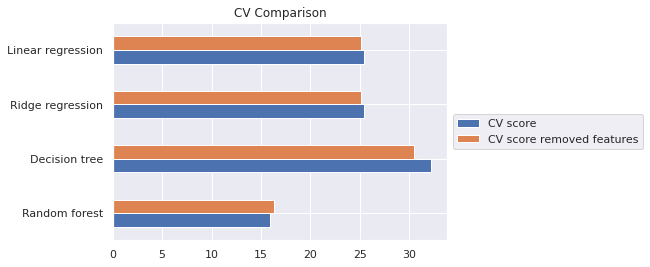

In [64]:
combined_df[['CV score', 'CV score removed features']].plot(kind='barh', title = 'CV Comparison').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

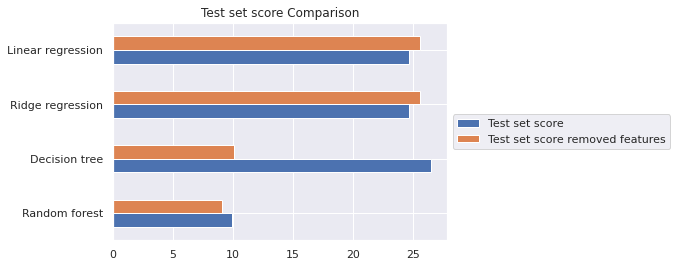

In [65]:
combined_df[['Test set score', 'Test set score removed features']].plot(kind='barh', title = 'Test set score Comparison').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Conclusion

In today's class we learned:
*   The choice of models matters: random forest outperformed other regression models.
*   How to tune hyperparameters for an ML model.
*   Data science has an ethical perspective.
*   Sometimes in ML, less is more: by removing features with low impact we improve the results of our model.

